In [60]:
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline 

## Загружаем данные


In [10]:
data = pd.read_csv('./Master_Ranked_Games.csv',index_col=[0])
data.reset_index(drop=True, inplace=True)
print(data.shape)

(107125, 49)


In [11]:
data.head()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1429,0,1,1,0,0,0,0,0,4,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,1313,0,0,1,0,0,0,0,0,3,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,1660,1,0,0,1,1,1,1,1,9,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,984,1,1,1,0,1,0,2,0,5,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,1437,0,1,1,0,1,0,2,0,3,...,39,71794,45798,565,68,13.6,150,7,47523,47150


In [14]:
new_data = data.drop(columns=['redWins', 'redFirstBlood', 'redFirstTower', 'redFirstDragon', 'blueAvgLevel', 'redAvgLevel'])
new_data

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1429,0,1,1,0,0,0,0,0,4,...,7,45,53831,41991,609,64,127,4,12916,26338
1,1313,0,0,1,0,0,0,0,0,3,...,6,43,52924,39672,510,63,133,4,12252,29828
2,1660,1,0,0,1,1,1,1,1,9,...,30,22,61745,46516,630,65,153,2,17005,37066
3,984,1,1,1,0,1,0,2,0,5,...,26,5,25007,21444,304,41,51,1,10499,3085
4,1437,0,1,1,0,1,0,2,0,3,...,19,39,71794,45798,565,68,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,2479,1,1,0,0,0,0,3,1,7,...,42,41,149798,72167,789,86,258,6,34890,62124
107121,932,0,0,0,0,0,0,0,0,0,...,5,26,37534,32931,364,51,110,5,11983,31400
107122,2081,0,1,1,0,0,0,1,0,6,...,25,68,97369,71576,797,85,222,8,33499,79612
107123,1619,0,0,0,0,0,0,1,0,2,...,23,68,116262,59001,524,72,162,11,52292,60903


In [18]:
data_norm = (new_data - new_data.mean(axis = 0)) / new_data.std(axis = 0)

## Выборка

In [20]:
x = data_norm.drop(['blueWins'], axis=1)
y = data['blueWins']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=42)

## Обучаем классификатор 


In [24]:
mlp_model = MLPClassifier(hidden_layer_sizes = (13,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [26]:
%%time
mlp_model.fit(x_train, y_train)

Wall time: 7.56 s


MLPClassifier(activation='logistic', hidden_layer_sizes=(13,), random_state=42,
              solver='lbfgs')

## Качество

In [42]:
n = 26785
print(y_test[n],mlp_model.predict([x_test.loc[n,:]])[0])

1 1


In [43]:
n = 10501
print(y_test[n],mlp_model.predict([x_test.loc[n,:]])[0])

0 0


In [45]:
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)


In [46]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.005588539138443921 0.008625196027182437


## Подбор _гипер_параметров


In [51]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (13,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

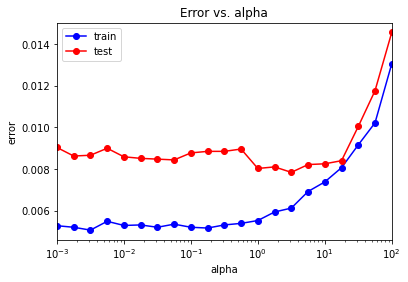

In [52]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

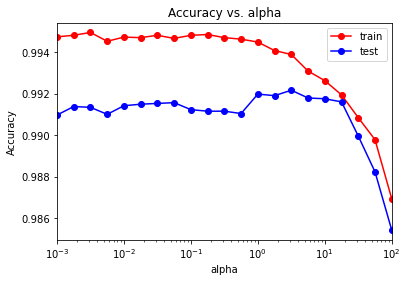

In [53]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [54]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.005065780466250949 0.007841087297438577


In [55]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt) 

[3.16227766]


In [56]:
alpha_opt = alpha_opt[0]

## Классификатор при найденном оптимальном значении

In [59]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (13,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0061237444456891076
0.007841087297438577


## Матрица рассогласования


In [61]:
print(confusion_matrix(y_test_pred, y_test))

[[13456   110]
 [  100 13116]]


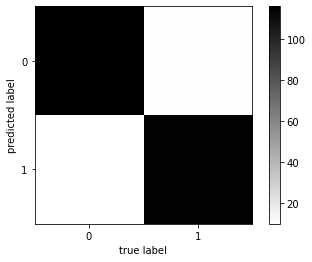

In [62]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

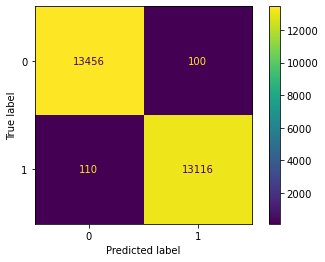

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, x_test, y_test) 